## What is a Classification Problem? 

Neural Network Classification: Predicting things.

Linear Regression: Predicting number.

https://www.learnpytorch.io/02_pytorch_classification/



A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>
    
Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch. 

In other words, taking a set of inputs and predicting what class those set of inputs belong to.



### The inputs and outputs of Classification

Inputs:  

- Pictures (pixel values: Width x Height x Color Chanel[R,G,B])
- Shapes: [Batch Size(usually 32), Color Channels, Width, Height] 

Outputs:  
- Predicted value of each categories (proberbilities)
- [Shapes = Option of Classes we have]

## What we're going to cover

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Getting binary classification data ready** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together with multi-class classification** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |

## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## 1. Make Classification data and get it ready

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: {X[:5]},size of X: {X.shape}")
print(f"First 5 samples of y: {y[:5]},size of y: {y.shape} ")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]],size of X: (1000, 2)
First 5 samples of y: [1 1 1 1 0],size of y: (1000,) 


we can see that for X, there are two features, and Y has only 1 output(either 0 or 1)

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y}) # input a dictionary

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Text(0.5, 0, 'Feature 0')

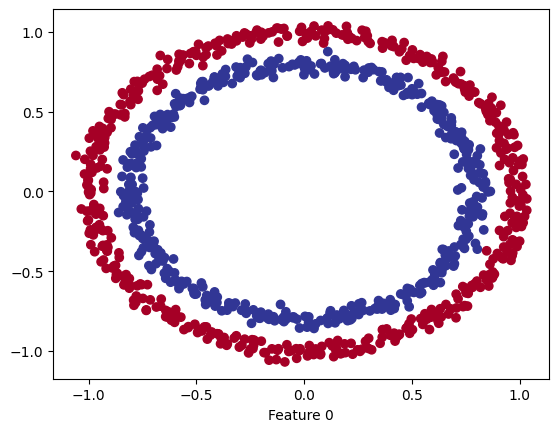

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x= X[:,0],y = X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 0")

now we can see from the graph that in the classification problem, we are trying to classify a point based on which circles it's in. so given two number(X1,X2) -> Blue Dots or Red Dots


### 1.1 Check input and output shapes

in ML we deal with data in tensor form, and one of the most common errors is the mismatch of input/output shape. Therefore, before doing any muniplation, first check for the input and output shape.

In [7]:
X.shape, y.shape
# notice that the second number of X's shape is 2, meaning there are 2 features.

((1000, 2), (1000,))

In [8]:
#converting to tensors
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
 

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1


### 1.2 Turn data into tensors and create train and test splits

In [9]:


import torch 
torch.__version__ #at least 1.10


'2.9.0+cpu'

In [10]:
#let's check what type of data structures our data are
type(X_sample), type(y_sample)

(numpy.ndarray, numpy.int64)

In [11]:
#they are numpy array. we need to convert them to tensors
if not isinstance(X, torch.Tensor):
    X = torch.from_numpy(X).type(torch.float32)
if not isinstance(y, torch.Tensor):
    y = torch.from_numpy(y).type(torch.float32)


# the default type is double-precision float32,
# but the dafult type of numpy is int64. so we need to convert to float32 to save memory

In [12]:
X[:5], y[:5] # we should now get tensor data type

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# the 1000 data sets is set to 800 training and 200 test sets.

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

## 2. Building a model

Let's build a model to classify our blue and red dots. 

To do so, we want to:
1. Setup device agonistic code
2. Construct a model(by subclssing  `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop.

In [15]:
# Set up device- agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [16]:
import torch
from torch import nn

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

# Create an instance of the model and send it to the target device
model_0 = CircleModelV0().to(device)

another way to construct a model is to use pre-built class... this allows faster model building, but of course, subclassing nn.module is more flexible

In [17]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [18]:
model_0.state_dict()
# Five values for bias in layer 1 (5 neurons) and 10 values for weights (2 features * 5 neurons)

OrderedDict([('0.weight',
              tensor([[ 0.0171,  0.0605],
                      [ 0.4402,  0.1842],
                      [-0.3024,  0.1747],
                      [-0.0205,  0.1927],
                      [ 0.4849,  0.1521]])),
             ('0.bias', tensor([-0.1208, -0.0929, -0.6427, -0.0122, -0.6942])),
             ('1.weight',
              tensor([[ 0.0874,  0.2722, -0.3977, -0.1810,  0.3626]])),
             ('1.bias', tensor([-0.1189]))])

In [19]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device)) #make sure X_test is on the same device as model
print(f"Lengh of untrained preds: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, shape: {y_test.shape}")
print(f"\n untrained_preds[:5] : {untrained_preds[:5]}")
print(f"\n y_test[:5] : {y_test[:5]}")

Lengh of untrained preds: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200])

 untrained_preds[:5] : tensor([[-0.3025],
        [-0.1363],
        [-0.4466],
        [-0.2629],
        [ 0.0161]])

 y_test[:5] : tensor([1., 0., 1., 0., 1.])


### 2.1 Set up losss function and optimizer

Which loss function or optimizer should you use? 

This is problem specific.

For regression: 
loss-function： MAE or MSE (mean absolute error or mean square error)

For classification you might want binary cross entropy or categorical cross entropy(or just entropy)

* as a reminder, the loss function measures how wrong your models predictions are

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`). 

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Multi-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these are some common ones you'll see.*

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.
>
> Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use? 

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer. 

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer. 

For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

In [20]:
# Set up the loss function and optimizer
from pickletools import optimize


loss_fn = nn.BCELoss() #requires inputs to have gone through the sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss() #for binary classification = sigmoid + binary cross entropy loss

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [21]:
# Lets calculate the accuracy of our untrained model
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc  

accuracy_fn(y_true=y_test.to(device), y_pred=torch.round(torch.sigmoid(untrained_preds)))

10000.0

## 3 Train the model

Here are the steps for training...

1. Forward Pass
2. Calculate the loss
3. Zero gradients
4. Perform Backpropagation on the loss - computes the gradient of the loss with respect for every model paramterr to be updated. This is known as backpropagation

5. Step the optimizer(gradient descent) - update the parameters with respect to the loss gradients in order to improve them. 

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation funct (e.g. sigmoid for binary and softmax for multiclass classification)

Then we can convert our model's prediction probabiliteis to ** prediction labels** by either rounding them or taking the argmax()

In [22]:
# View the first 5 outputs of the forward pass on the test data 
model_0.eval() # set the model to evaluation mode
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
    # without passing in any activation function, just passing through the layers...
y_logits

tensor([[-0.3025],
        [-0.1363],
        [-0.4466],
        [-0.2629],
        [ 0.0161]])

In [ ]:
y_test[:5] #to compare with y_logits

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits) 
# output how likely the model thinks the output is class 1
y_pred_probs

tensor([[0.4250],
        [0.4660],
        [0.3902],
        [0.4347],
        [0.5040]])

For our prediction probability values, we need to perform a range-style round on them
* if `y_pred_probs` >= 0.5 -> y = 1
* otherwise y = 0

this rule can be adjusted to see how stick(certain) you want to be

In [ ]:
# Now we can pass these to the round function. 
y_preds = torch.round(y_pred_probs)

# In full， in line  (logis-> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


### 3.2 Building a training and testing loop for our model.